#Um Estudo Simples de Mapa de Violência em algumas cidades da Grande BH

## Criando a Geometria do Mapa

Para comecarçamos precisamos dos dados do estado, isso pode ser feito atráves do site do IBGE, que fornece os arquivos shapefile, que vai nos permite modelar nossos dados. O arquivo pode ser acessado por aqui: https://www.ibge.gov.br/geociencias/downloads-geociencias.html.

Com o arquivo já baixado e feito o upload para o notebook, vamos a construção. 

**Um aviso importante, caso esteja fazendo pelo colab, é necessário que suba todos os arquivos da pasta zip que baixou do IBGE***

In [ ]:
# instalando o geo pandas 
! pip install geopandas

In [ ]:
# impotando as bibliotecas
# importando as bbt
import openpyxl
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point

In [ ]:
# impotando e visualizando os dados
df = gpd.read_file('/content/MG_Municipios_2021.shp')
df.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3100104,Abadia dos Dourados,MG,880.461,"POLYGON ((-47.43543 -18.16778, -47.43401 -18.1..."
1,3100203,Abaeté,MG,1817.067,"POLYGON ((-45.16777 -18.89073, -45.16719 -18.8..."
2,3100302,Abre Campo,MG,470.551,"POLYGON ((-42.38219 -20.12176, -42.38205 -20.1..."
3,3100401,Acaiaca,MG,101.886,"POLYGON ((-43.13156 -20.34249, -43.13143 -20.3..."
4,3100500,Açucena,MG,815.422,"POLYGON ((-42.37085 -18.92507, -42.37036 -18.9..."


Observe que temos as mesma estrutura de um DataFrame se tivesseos usando o Pandas, a diferença aqui é a coluna `geometry`. Que vamos trabalhar nea para a modelagem gemetrica dos dados.

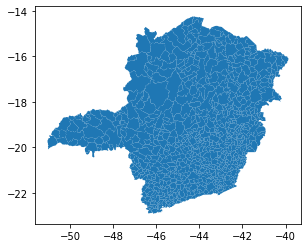

In [ ]:
# um simples plotagem
df.plot()

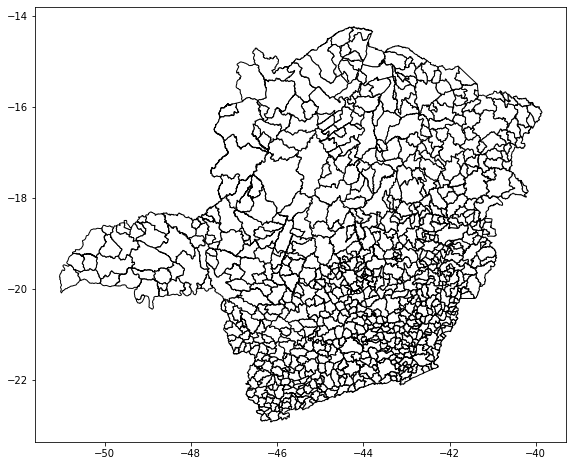

In [ ]:
# melhorando nossa plotagem
df.plot(figsize=(12,8), facecolor='w', edgecolor='k')

Como queremos apenas algumas cidades da grande BH vamos filtrar nosso conjunto dados para abranger apenas as cidades que englobam a grande Bh.

In [ ]:
# lista de cidades que vamos usar
cid = ['Belo Horizonte', 'Contagem', 'Ibirité', 
       'Nova Lima', 'Lagoa Santa', 'Sabará', 
       'Vespasiano', 'Betim', 'Ribeirão das Neves', 
       'Santa Luzia', 'Esmeraldas', 'Juatuba',
       'Brumadinho', 'Igarapé', 'Caeté', 
       'Sarzedo', 'Mário Campos', 'São Joaquim de Bicas']

In [ ]:
# fazendo nossa seleção
selecao = df['NM_MUN'].isin(cid)
df_cid = df[selecao]
df_cid

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
65,3106200,Belo Horizonte,MG,331.354,"POLYGON ((-43.94948 -19.77643, -43.94946 -19.7..."
71,3106705,Betim,MG,343.884,"POLYGON ((-44.17798 -19.83425, -44.17746 -19.8..."
96,3109006,Brumadinho,MG,639.434,"POLYGON ((-44.01339 -20.05964, -44.01328 -20.0..."
108,3110004,Caeté,MG,542.531,"POLYGON ((-43.62407 -19.69919, -43.62373 -19.6..."
204,3118601,Contagem,MG,194.746,"POLYGON ((-44.13276 -19.79931, -44.13231 -19.7..."
269,3124104,Esmeraldas,MG,909.751,"POLYGON ((-44.24489 -19.57696, -44.24461 -19.5..."
337,3129806,Ibirité,MG,72.395,"POLYGON ((-44.07909 -19.96835, -44.07883 -19.9..."
341,3130101,Igarapé,MG,110.942,"POLYGON ((-44.27702 -19.99576, -44.27673 -19.9..."
418,3136652,Juatuba,MG,97.172,"POLYGON ((-44.34825 -19.91091, -44.34816 -19.9..."
430,3137601,Lagoa Santa,MG,229.409,"POLYGON ((-43.95175 -19.53531, -43.95143 -19.5..."


In [ ]:
df_cid.shape

(18, 5)

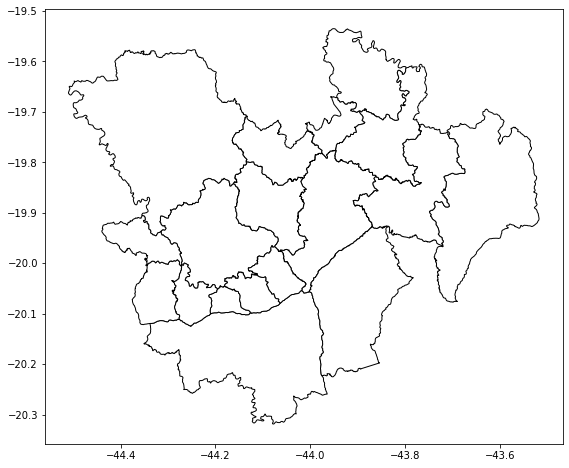

In [ ]:
# plotando novo gráfico
df_cid.plot(figsize=(12,8), facecolor='w', edgecolor='k')

Aqui plotamos o mapa com algumas cidades da grande BH, além dessa plotagem podemos salvar esse arquivo nosso, no caso em geojson, salvando desta forma fica mais fácil de manipular lá na frente, caso venha ser feito um novo trabalho. Então abaixo deixo o passo a passo.

In [ ]:
# salvando os arquivos
df_cid.to_file('Algumas_cidades_grande_bh.json', driver='GeoJSON')

## Dados de Crimes Violentos em BH

Com o nosso mapa já modelado vamos agora dá uma olhada nosso conjunto de dados de crime violentos, aqui não vamos fazer uma análise exploratoria dos dados, apenas preparar eles para usar em nosso mapa. Os dados podem ser acessados atráves do portal do governo de Minas: http://www.seguranca.mg.gov.br/2018-08-22-13-39-06/dados-abertos

In [ ]:
df_cr = pd.read_excel('Banco Crimes Violentos - Atualizado 10 - Outubro.xlsx')
df_cr.head()

,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2018,10,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2018,7,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2018,12,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2018,12,12,NÃO
4,0,Estupro Consumado,ACUCENA,310050,1,2018,12,12,NÃO


In [ ]:
df_cr.dtypes

Registros     int64
Natureza     object
Município    object
Cod IBGE      int64
Mês           int64
Ano           int64
RISP          int64
RISP Nova     int64
RMBH         object
dtype: object

In [ ]:
# verificando o tamanho
df_cr.shape

(643162, 9)

Aqui vamos ter que criar outra lista, removendo acentos e deixando as palavras tudo em maísculo para encontrar a cidada que desejamos.

In [ ]:
# vendo os valores unicos
df_cr['Natureza'].unique()

array(['Estupro Consumado', 'Estupro de Vulnerável Consumado',
       'Estupro de Vulnerável Tentado', 'Estupro Tentado',
       'Extorsão Consumado', 'Extorsão Mediante Sequestro Consumado',
       'Extorsão Tentado', 'Homicídio Tentado', 'Roubo Consumado',
       'Roubo Tentado', 'Sequestro e Cárcere Privado Consumado',
       'Sequestro e Cárcere Privado Tentado',
       'Homicídio Consumado (Registros)'], dtype=object)

In [ ]:
# vendo quantidade de cada crime em Minas Gerais
crimes = df_cr.groupby(['Natureza']).sum()
crimes = crimes['Registros']
crimes

Natureza
Estupro Consumado                          5490
Estupro Tentado                            1120
Estupro de Vulnerável Consumado           14630
Estupro de Vulnerável Tentado               711
Extorsão Consumado                         3737
Extorsão Mediante Sequestro Consumado       291
Extorsão Tentado                           1033
Homicídio Consumado (Registros)           12345
Homicídio Tentado                         13144
Roubo Consumado                          211162
Roubo Tentado                             13105
Sequestro e Cárcere Privado Consumado      1130
Sequestro e Cárcere Privado Tentado          47
Name: Registros, dtype: int64

In [ ]:

! pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import unidecode 

# cid_cr = unidecode.unidecode(cid)
cid_cr = []
for i in cid:
  cid_cr.append(unidecode.unidecode(i).upper())
  # print(i)
cid_cr

['BELO HORIZONTE',
 'CONTAGEM',
 'IBIRITE',
 'NOVA LIMA',
 'LAGOA SANTA',
 'SABARA',
 'VESPASIANO',
 'BETIM',
 'RIBEIRAO DAS NEVES',
 'SANTA LUZIA',
 'ESMERALDAS',
 'JUATUBA',
 'BRUMADINHO',
 'IGARAPE',
 'CAETE',
 'SARZEDO',
 'MARIO CAMPOS',
 'SAO JOAQUIM DE BICAS']

In [ ]:
# fazendo a seleção
selecao_cr = df_cr['Município'].isin(cid_cr)
df_cr_cid = df_cr[selecao_cr]
df_cr_cid

,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
65,27,Estupro Consumado,BELO HORIZONTE,310620,1,2018,1,1,NÃO
71,5,Estupro Consumado,BETIM,310670,1,2018,2,2,SIM
96,0,Estupro Consumado,BRUMADINHO,310900,1,2018,2,2,SIM
109,1,Estupro Consumado,CAETE,311000,1,2018,3,3,SIM
205,2,Estupro Consumado,CONTAGEM,311860,1,2018,2,2,SIM
...,...,...,...,...,...,...,...,...,...
642982,4,Homicídio Consumado (Registros),SANTA LUZIA,315780,10,2022,3,3,SIM
643046,0,Homicídio Consumado (Registros),SAO JOAQUIM DE BICAS,316292,10,2022,2,2,SIM
643077,0,Homicídio Consumado (Registros),SARZEDO,316553,10,2022,2,2,SIM
643151,1,Homicídio Consumado (Registros),VESPASIANO,317120,10,2022,3,3,SIM


Algo que se pode perceber aqui é que poderiamos pegar as cidades da Garnde Bh, através da coluna `RMBH` mas como não queremos todas as cidades, fizemos outro filtro, que pode ser visto nos códigos acima. Agora vamos agrupara os nossos dados, vale ressaltar que vou agrupar crimes em geral e não especificar crime por crime, pois o objetivo deste estudo é apenas mostrar a quantidade de crime violentos em agluams cidades da Grande Bh. Sem mais enrolações, vamos ao código.

In [ ]:
# agrupando os dados que vamos usar para o mapa
df_cr_gbh = df_cr_cid.groupby(['Município']).sum()
df_cr_gbh = df_cr_gbh.reset_index()
df_cr_gbh = df_cr_gbh[['Município', 'Registros']]
df_cr_gbh

,Município,Registros
0,BELO HORIZONTE,78646
1,BETIM,12540
2,BRUMADINHO,312
3,CAETE,507
4,CONTAGEM,27429
5,ESMERALDAS,1213
6,IBIRITE,2007
7,IGARAPE,932
8,JUATUBA,831
9,LAGOA SANTA,769


## Criando o Mapa

Agora que já temos nosso arquivo em json e nossos dados ja filtrados para fazer a aplicação vamos a criação do nosso mapa. Para isso vamos fazer uso da biblioteca `Folium`, a qual já importamos lá encima. Vamos ao código.

In [ ]:
# apresentação de um mapa geral
fmap = folium.Map()
fmap

In [ ]:
# imporatando nossa geometrai no formato GeoJson
geometrias = gpd.read_file('Algumas_cidades_grande_bh.json', driver='GeoJSON')

Eu peguei uma latitude e longitude média da grande bh para que o nosso mapa fica melhor centralizado, no caso tenha um melhor encaixe na visualização.

In [ ]:
# preparando o zoom e plotando o mapa sem demarcação
latitude = -19.8157
longitude = -43.9542

fmap = folium.Map(location=[latitude, longitude])
fmap

Com isso vamos plotar o nosso gráfico que junto com uma tag demostra a quantidade de roubo em cada municipio, juntamente com a demarcação que criamos e exportamos para um arquivo Json. Uma coisa que vale resaltar é o valor colocado no `tiles` que é para que nosso mapa fique com uma cor mais fosca.

Para essa plotagem, vamos fazer a junção dos nossos DataFarme, no caso nossa geometria e a quantidade de crimes violentos em cada cidade.

In [ ]:
# conferindo tamanho dos dados
print(df_cr_gbh.shape) # 15
print(geometrias.shape) # 15

(18, 2)
(18, 5)


Aqui agora vamos fazer uma união de duas colunas, no caso da nossa geometria e dos nossos dados de crime, primeiro já verificams que tem o mesmo número de linhas e com isso já pdemos fazer essa união. Vamos ao código.

In [ ]:
geometrias # ordem alfabetica

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3106200,Belo Horizonte,MG,331.354,"POLYGON ((-43.94948 -19.77643, -43.94946 -19.7..."
1,3106705,Betim,MG,343.884,"POLYGON ((-44.17798 -19.83425, -44.17746 -19.8..."
2,3109006,Brumadinho,MG,639.434,"POLYGON ((-44.01339 -20.05964, -44.01328 -20.0..."
3,3110004,Caeté,MG,542.531,"POLYGON ((-43.62407 -19.69919, -43.62373 -19.6..."
4,3118601,Contagem,MG,194.746,"POLYGON ((-44.13276 -19.79931, -44.13231 -19.7..."
5,3124104,Esmeraldas,MG,909.751,"POLYGON ((-44.24489 -19.57696, -44.24461 -19.5..."
6,3129806,Ibirité,MG,72.395,"POLYGON ((-44.07909 -19.96835, -44.07883 -19.9..."
7,3130101,Igarapé,MG,110.942,"POLYGON ((-44.27702 -19.99576, -44.27673 -19.9..."
8,3136652,Juatuba,MG,97.172,"POLYGON ((-44.34825 -19.91091, -44.34816 -19.9..."
9,3137601,Lagoa Santa,MG,229.409,"POLYGON ((-43.95175 -19.53531, -43.95143 -19.5..."


In [ ]:
df_cr_gbh # ordem alfabetica

,Município,Registros
0,BELO HORIZONTE,78646
1,BETIM,12540
2,BRUMADINHO,312
3,CAETE,507
4,CONTAGEM,27429
5,ESMERALDAS,1213
6,IBIRITE,2007
7,IGARAPE,932
8,JUATUBA,831
9,LAGOA SANTA,769


In [ ]:
geometria = pd.concat([geometrias, df_cr_gbh['Registros']], axis=1)
geometria

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry,Registros
0,3106200,Belo Horizonte,MG,331.354,"POLYGON ((-43.94948 -19.77643, -43.94946 -19.7...",78646
1,3106705,Betim,MG,343.884,"POLYGON ((-44.17798 -19.83425, -44.17746 -19.8...",12540
2,3109006,Brumadinho,MG,639.434,"POLYGON ((-44.01339 -20.05964, -44.01328 -20.0...",312
3,3110004,Caeté,MG,542.531,"POLYGON ((-43.62407 -19.69919, -43.62373 -19.6...",507
4,3118601,Contagem,MG,194.746,"POLYGON ((-44.13276 -19.79931, -44.13231 -19.7...",27429
5,3124104,Esmeraldas,MG,909.751,"POLYGON ((-44.24489 -19.57696, -44.24461 -19.5...",1213
6,3129806,Ibirité,MG,72.395,"POLYGON ((-44.07909 -19.96835, -44.07883 -19.9...",2007
7,3130101,Igarapé,MG,110.942,"POLYGON ((-44.27702 -19.99576, -44.27673 -19.9...",932
8,3136652,Juatuba,MG,97.172,"POLYGON ((-44.34825 -19.91091, -44.34816 -19.9...",831
9,3137601,Lagoa Santa,MG,229.409,"POLYGON ((-43.95175 -19.53531, -43.95143 -19.5...",769


In [ ]:
latitude = -19.8157
longitude = -43.9542

# plotando o mapa final
fmap = folium.Map(location=[latitude, latitude], tiles='cartodbpositron')

for _, geometria in geometria.iterrows():
  geometria_geojson = folium.features.GeoJson(geometria.geometry, style_function = lambda feature: {
      'color': 'blue', 'weight': 2, 'fillOpacity': 0.1}) 
  popup = folium.Popup("""
                          Município: {} <br>
                          Quant. de Crimes Violentos entre 2018 e 2022: {}
                          """.format(geometria.NM_MUN, str(int(geometria.Registros))), max_width=300)
  popup.add_to(geometria_geojson)
  geometria_geojson.add_to(fmap)
fmap.save('Crimes_Violentos_em_algumas_Cidades_da_Grande_BH.html')

Talvez o seu `html` dê um problema de visualização mas a solução é simples, apenas dê um zoom out que ele já vai mostrar o mapa e clicando nas cidades ele mostra o pop-up. Espero que tenha sido últil o notebook.